In [42]:
#This Analysis is for renewable and non-renewable share of energy production.


In [43]:
import numpy as ny
import pandas as pd
import matplotlib.pyplot as plot

In [44]:
df=pd.read_csv(r'C:/Users/Sumit/OneDrive/Documents/GITHUB IBM DA/India-Energy-Analytics-Model/CEA_DGR_data.csv')

In [45]:
ap = df[['yyyymmdd', 'CEA.DGR.COL']]
print(ap)


      yyyymmdd  CEA.DGR.COL
0     20180401      2702.66
1     20180402      2739.58
2     20180403      2862.08
3     20180404      2907.16
4     20180405      2904.87
...        ...          ...
2302  20240720      3502.10
2303  20240721      3370.17
2304  20240722      3470.55
2305  20240723      3386.45
2306  20240724          NaN

[2307 rows x 2 columns]


In [51]:

# Convert the date column to datetime format
df['yyyymmdd'] = pd.to_datetime(df['yyyymmdd'], format='%Y%m%d')

# Extract the year from the date
df['year'] = df['yyyymmdd'].dt.year

# Group by the year and sum the values
yearly_sum = df.groupby('year')['CEA.DGR.COL'].sum().reset_index()

# Rename the columns for clarity
yearly_sum.columns = ['year', 'total_value']

# Display the resulting DataFrame
yearly_sum=yearly_sum.drop(index=6)
print(yearly_sum)



   year   total_value
0  2018  7.393204e+05
1  2019  9.628467e+05
2  2020  7.579927e+05
3  2021  1.033305e+06
4  2022  1.124184e+06
5  2023  1.226701e+06


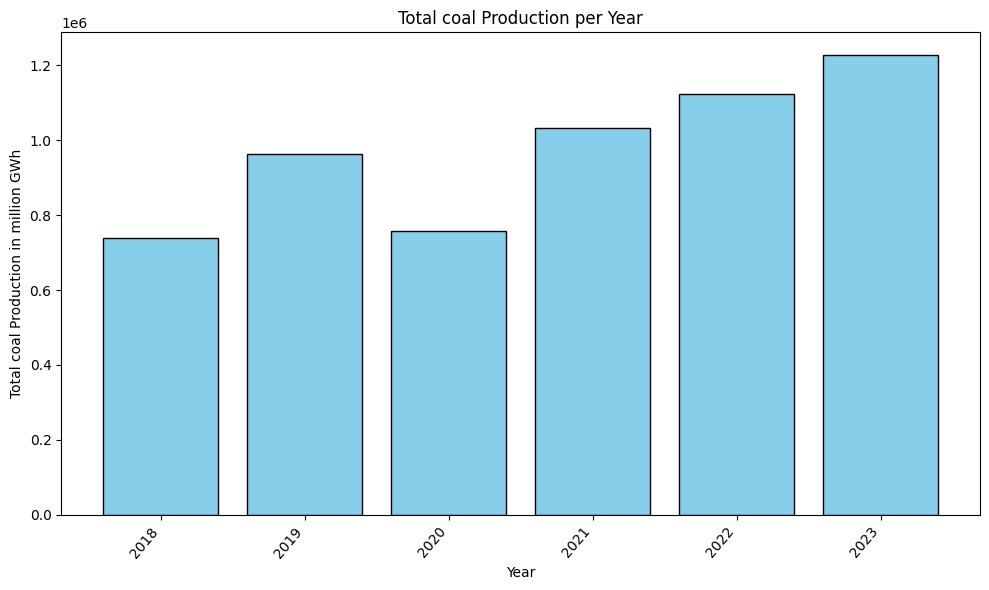

In [56]:

plot.figure(figsize=(10, 6))
plot.bar(yearly_sum['year'], yearly_sum['total_value'], color='skyblue', edgecolor='black')
plot.xlabel('Year')
plot.ylabel('Total coal Production in million GWh')
plot.title('Total coal Production per Year')
plot.xticks(rotation=50, ha='right')
plot.tight_layout()
plot.show()